Index:190098M

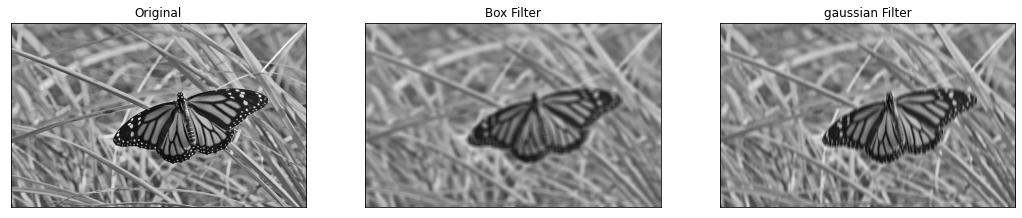

In [2]:
#01
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread(r"IMG\butterfly.jpg", cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.float32)
assert img is not None
sigma = 4
kernel_Box = np.ones((9,9),np.float32)/81
gaussian = cv.getGaussianKernel(9,sigma)
imgc = cv.filter2D(img,-1, kernel_Box)
img_gaus = cv.filter2D(img,-1,gaussian )

fig,ax= plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
ax[0].imshow(img,cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(imgc,cmap='gray',vmin=0, vmax=255)
ax[1].set_title('Box Filter')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(img_gaus,cmap='gray',vmin=0, vmax=255)
ax[2].set_title('gaussian Filter')
ax[2].set_xticks([]), ax[1].set_yticks([])
plt.show()

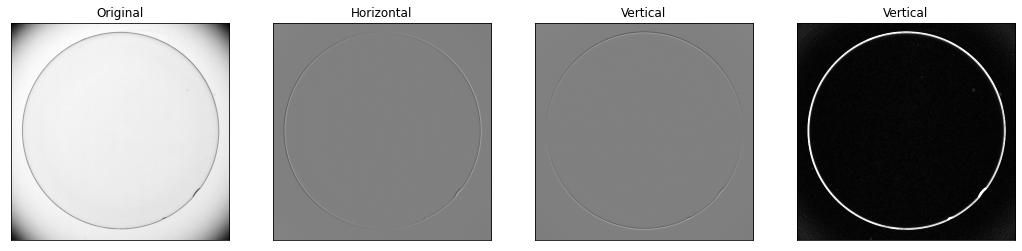

In [4]:
#Q02
img = cv.imread(r"IMG/contact_lens.tif", cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.float32)
kernel_h = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype='float')
kernel_v = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype='float')
img_h = cv.filter2D(img,-1, kernel_h)
img_v = cv.filter2D(img,-1, kernel_v)
grad_mag = np.sqrt(img_v**2 + img_h**2)

fig,ax= plt.subplots(1,4, sharex='all', sharey='all', figsize=(18,18))
ax[0].imshow(img,cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(img_v,cmap='gray',vmin=-1020, vmax=1020)
ax[1].set_title('Horizontal')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(img_h,cmap='gray',vmin=-1020, vmax=1020)
ax[2].set_title('Vertical')
ax[2].set_xticks([]), ax[1].set_yticks([])
ax[3].imshow(grad_mag,cmap='gray',vmin=0, vmax=255)
ax[3].set_title('Vertical')
ax[3].set_xticks([]), ax[1].set_yticks([])
plt.show()

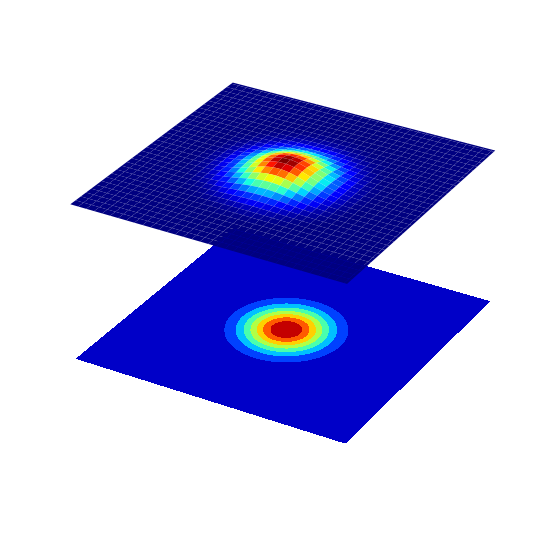

In [5]:
#q03
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(-5,5.1,0.1)
y = np.arange(-5,5.1,0.1)
X,Y = np.meshgrid(x,y)

sigma = 1
Z = np.exp(-(X**2+Y**2)/(2*sigma**2))/(2*np.pi*sigma**2)

surf=ax.plot_surface(X,Y,Z, cmap = cm.jet, linewidth=0,antialiased=True)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

cset = ax.contourf(X,Y,Z,zdir='z',offset=np.min(Z)-1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z)-2, np.max(Z))

plt.axis('off')
plt.show()


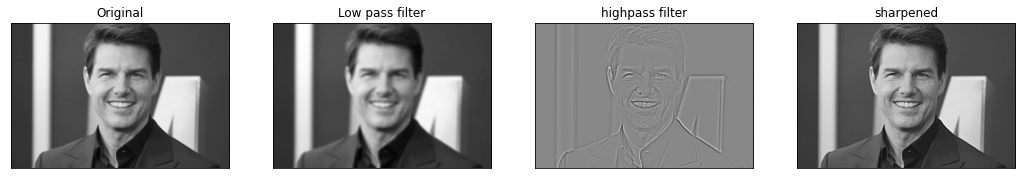

In [15]:
img = cv.imread(r"IMG/tom.jpg",cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.float32)
assert img is not None

sigma = 2
gaussian_1d = cv.getGaussianKernel(5,sigma)
f_lp = cv.sepFilter2D(img,-1,gaussian_1d,gaussian_1d)
f_hp = img-f_lp
f_sharpened = cv.addWeighted(img,3.0,f_hp,2.0,1)



fig,ax= plt.subplots(1,4, sharex='all', sharey='all', figsize=(18,18))
ax[0].imshow(img,cmap='gray',vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(f_lp,cmap='gray')
ax[1].set_title('Low pass filter')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(f_hp,cmap='gray')
ax[2].set_title('highpass filter')
ax[2].set_xticks([]), ax[2].set_yticks([])
ax[3].imshow(f_sharpened,cmap='gray')
ax[3].set_title('sharpened')
ax[3].set_xticks([]), ax[3].set_yticks([])
plt.show()